In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os

#deep learning libraries 
from keras_preprocessing.image import load_img,img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop

DISPLAY OF IMG (/_*-*_/)

In [2]:
pic_siz=48
fol_path="d:/face_recognition_4thyr_proj/Images/"

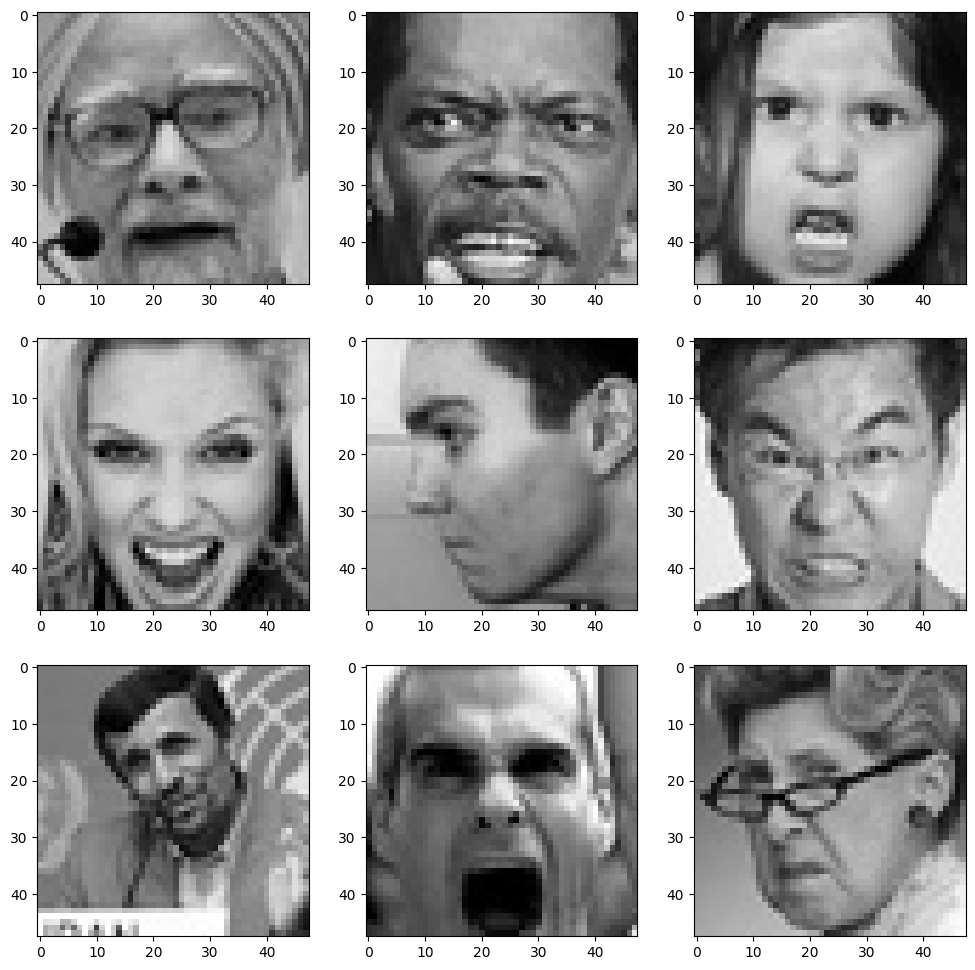

In [3]:
exp1='angry'
plt.figure(figsize=(12,12))
for i in range(1,10):
    plt.subplot(3,3,i)
    img=load_img(fol_path+"train/"+exp1+"/"+os.listdir(fol_path+"train/"+exp1+"/")[i] , target_size=(pic_siz,pic_siz))
    plt.imshow(img)
plt.show()

In [4]:
btch_size=128

train_data=ImageDataGenerator()
vali_data=ImageDataGenerator()

train_Set=train_data.flow_from_directory(fol_path+"train",
                                        target_size=(pic_siz,pic_siz),
                                        color_mode="grayscale",
                                        batch_size=btch_size,
                                        class_mode="categorical",
                                        shuffle=True)
test_set=vali_data.flow_from_directory(fol_path+"validation",
                                        target_size=(pic_siz,pic_siz),
                                        color_mode="grayscale",
                                        batch_size=btch_size,
                                        class_mode="categorical",
                                        shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
from keras.optimizers import Adam,SGD,RMSprop
from keras import layers

no_of_class=7
model=Sequential()

#1st cnn layer
model.add(Conv2D(64,(3,3),padding='same' ,input_shape=(pic_siz,pic_siz,1)))
model.add(layers.Activation(activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd cnn layer
model.add(Conv2D(128,(3,3),padding='same'))
model.add(layers.Activation(activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd cnn layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(layers.Activation(activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(no_of_class,activation='softmax'))

opt=Adam(lr=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

d:\face_recognition_4thyr_proj\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

chckpt=ModelCheckpoint("d:/face_recognition_4thyr_proj/model1.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

early_stopping=EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
    )

reduced_lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbck_lst=[early_stopping,chckpt,reduced_lr]
epochs=48

In [7]:
model_his=model.fit(
    train_Set,
    steps_per_epoch=train_Set.samples//train_Set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples//test_set.batch_size,
    callbacks=callbck_lst
)

Epoch 1/48
225/225 [==============================] - 323s 1s/step - loss: 2.4760 - accuracy: 0.2837 - val_loss: 1.6303 - val_accuracy: 0.3983 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 261s 1s/step - loss: 2.0521 - accuracy: 0.3496 - val_loss: 1.5352 - val_accuracy: 0.4425 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 246s 1s/step - loss: 1.8921 - accuracy: 0.3823 - val_loss: 1.5045 - val_accuracy: 0.4452 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 246s 1s/step - loss: 1.7789 - accuracy: 0.4049 - val_loss: 1.4829 - val_accuracy: 0.4568 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 248s 1s/step - loss: 1.7257 - accuracy: 0.4171 - val_loss: 1.4940 - val_accuracy: 0.4533 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 254s 1s/step - loss: 1.6598 - accuracy: 0.4340 - val_loss: 1.4143 - val_accuracy: 0.4811 - lr: 1.0000e-04
Epoch 7/48
225/225 [====================

PLOTTING ACCURACY & LOSS

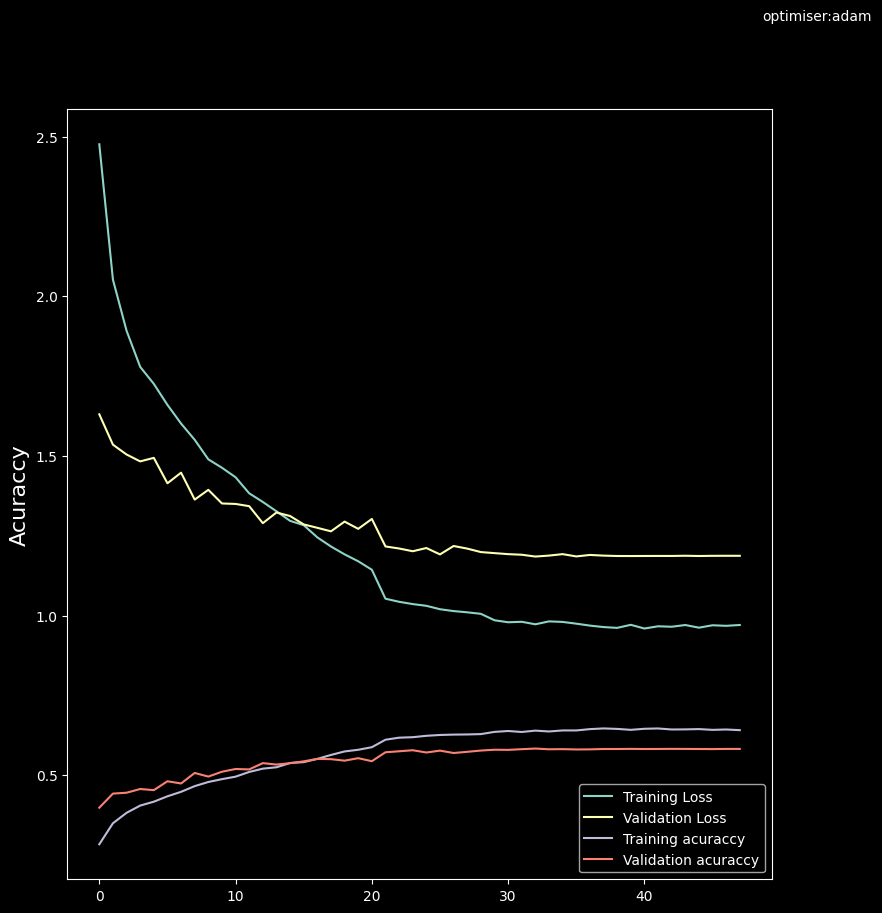

In [13]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('optimiser:adam',fontsize=10)
plt.ylabel('loss',fontsize=16)
plt.plot(model_his.history['loss'],label='Training Loss')
plt.plot(model_his.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,1)
plt.ylabel('Acuraccy',fontsize=16)
plt.plot(model_his.history['accuracy'],label='Training acuraccy')
plt.plot(model_his.history['val_accuracy'],label='Validation acuraccy')
plt.legend(loc='lower right')
plt.show()